In [1]:
import pandas as pd
import numpy as np
from glob import glob
from datetime import datetime, timedelta
from pandas import DataFrame

In [2]:
df_2020 = pd.read_csv('C:/Users/ching/Desktop/practice/movie/data/df_2020.csv')
#df_2020.tail()
#df_2020.info()

In [3]:
#今年發行之作品
condition = df_2020['上映日期'].str.contains('2020')
df_2020_0 = df_2020[condition]
df_2020_0.head()

,Unnamed: 0,序號,國別地區,中文片名,上映日期,申請人,出品,上映院數,銷售票數,週票數變動率,銷售金額,累計銷售票數,累計銷售金額
0,0,1,中華民國,還有一些樹,2020/1/4,蜂鳥影像有限公司,蜂鳥影像有限公司,1,67,39.58,14725,115,25400
1,1,2,美國,兔嘲男孩,2020/1/3,博偉電影股份有限公司,"BUENA VISTA INTERNATIONAL, INC.",65,"25,771",46.25,6022947,50223,11724767
2,2,3,美國,驅魔直播,2020/1/3,海樂影業股份有限公司,"THE CLEANSING HOUR, LLC.",43,"5,679",9.40,1255702,10870,2401379
3,3,4,美國,別告訴她,2020/1/3,車庫娛樂股份有限公司,"A24 INTERNATIONAL, LLC",40,"4,629",44.39,1025995,7835,1740609
4,4,5,日本,《少女與戰車 總集篇4DX》-第63屆戰車道全國高中生大會,2020/1/3,蜜蜂工房創藝有限公司,Hakuhodo DY music &amp## pictures Inc.,6,"1,617",12.06,738945,3060,1397105


In [4]:
#整體描述
diff = len(df_2020['中文片名'].unique()) - len(df_2020_0['中文片名'].unique()) #268

print('2020至8月底')
print('影片數量:'+str(len(df_2020_0['中文片名'].unique()))+f'(未列入非今年發行之作品{diff}部)')
print('影片國別地區數量:'+str(len(df_2020_0['國別地區'].unique())))
print('發行公司數量:'+str(len(df_2020_0['申請人'].unique())))

2020至8月底
影片數量:416(未列入非今年發行之作品268部)
影片國別地區數量:38
發行公司數量:71


In [5]:
#以國別地區groupby
country_list = df_2020_0['國別地區'].unique() #38
country_gp = df_2020_0.groupby('國別地區')

In [6]:
# 建立新dataframe
subject = ['影片數量','累積總票房(百萬)']
country_df = pd.DataFrame(index = country_list, columns = subject)

In [7]:
#計算影片數量
country_moviecount = []
country_moviecount_number = []

for country in country_list:
    n = country_gp.get_group(country)
    m = country+","+str(len(n['中文片名'].unique()))
    o = len(n['中文片名'].unique())
    country_moviecount.append(m)
    country_moviecount_number.append(o)
#     print(m)
#     print(o)

In [8]:
#將影片數量加入country_df
country_df['影片數量'] = country_moviecount_number
country_df.head()

,影片數量,累積總票房(百萬)
中華民國,31,NaN
美國,93,NaN
日本,80,NaN
印度,2,NaN
泰國,11,NaN


In [9]:
#計算累積票房金額
country_list = df_2020_0['國別地區'].unique()

all_boxoffice = []
country_boxoffice = []
country_boxoffice_number = []

for country in country_list:
    a = country_gp.get_group(country)
    name_list = a['中文片名'].unique()

    name_boxoffice = []

    for name in name_list:
        b = a.groupby('中文片名')
        c = b.get_group(name)
        d = name + ',' + str(max(c['累計銷售金額']))
        e = max(c['累計銷售金額'])
        name_boxoffice.append(e)
        #print(d)
        #print(e)

    f = country + ',' + str(sum(name_boxoffice))
    g = sum(name_boxoffice)
    country_boxoffice.append(f)
    country_boxoffice_number.append(g)
    
    h = sum(country_boxoffice_number)
    all_boxoffice.append(g)
#         print(f)
#         print(g)

In [10]:
#將累積票房加入country_df
country_df['累積總票房(百萬)'] = np.array(country_boxoffice_number)/1000000
country_df['平均票房/部(百萬)'] = country_df['累積總票房(百萬)']/country_df['影片數量']
country_df.head()

,影片數量,累積總票房(百萬),平均票房/部(百萬)
中華民國,31,264.122643,8.520085
美國,93,1097.087084,11.796635
日本,80,256.864026,3.210800
印度,2,1.424921,0.712461
泰國,11,28.019605,2.547237


In [11]:
#存成csv
Result ='C:/Users/ching/Desktop/practice/movie/data/df_only2020_bycountry.csv'
country_df.to_csv(Result, index=True )
print( '成功產出'+ Result)

成功產出C:/Users/ching/Desktop/practice/movie/data/df_only2020_bycountry.csv


In [12]:
#以影片數量排序
movies_sort_df = country_df.sort_values(by='影片數量', ascending=False, axis=0 )
movies_sort_df.head()

,影片數量,累積總票房(百萬),平均票房/部(百萬)
美國,93,1097.087084,11.796635
日本,80,256.864026,3.210800
南韓,42,514.350251,12.246435
法國,39,15.879395,0.407164
英國,34,22.566892,0.663732


In [13]:
#以累積總票房排序
boxoffice_sort_df = country_df.sort_values(by='累積總票房(百萬)', ascending=False, axis=0 )
boxoffice_sort_df.head()

,影片數量,累積總票房(百萬),平均票房/部(百萬)
美國,93,1097.087084,11.796635
南韓,42,514.350251,12.246435
中華民國,31,264.122643,8.520085
日本,80,256.864026,3.210800
香港,7,205.134614,29.304945


In [14]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

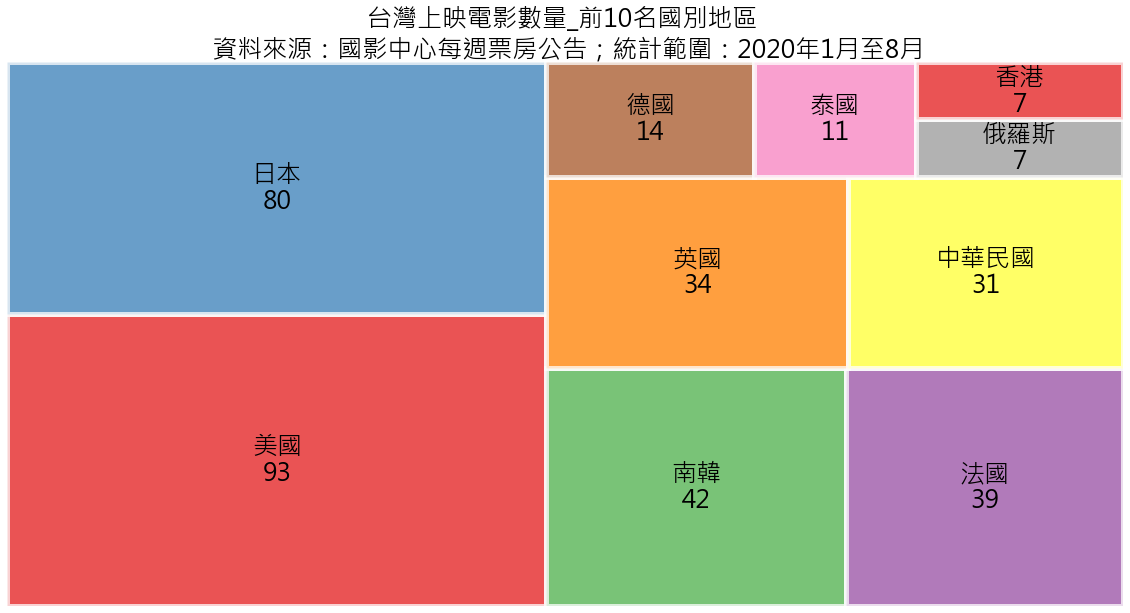

In [18]:
#以影片數量畫圖
#處理中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

#選取前10名資料
country0 = movies_sort_df._stat_axis.values.tolist()[:10]
movies0 =movies_sort_df['影片數量'].tolist()[:10]

#調色盤
current_palette = sns.color_palette('Set1',10)
        
#繪圖細節
plt.figure(figsize=(20,10))
plot = squarify.plot(sizes = movies0, 
                     label = country0, 
                     color = current_palette, 
                     alpha = 0.75, 
                     value = movies0, 
                     edgecolor = 'white',
                     linewidth = 5 )

plt.rc('font', size=20)
plot.set_title('台灣上映電影數量_前10名國別地區 \n 資料來源：國影中心每週票房公告；統計範圍：2020年1月至8月',fontdict = {'fontsize':25})
plt.axis('off')
plt.tick_params(top = 'off', right = 'off')

plt.show()